## Decision Tree Implementation

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [41]:
# Load Diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [42]:
diabetes.feature_names  # Access feature names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [43]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Define hyperparameter tuning space
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'ae'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

In [45]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['mse', 'friedman_mse', 'ae'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [46]:
# Print best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Score: -4329.449485249181


In [47]:
# Train Decision Tree Regressor model with best hyperparameters
dtr_best = DecisionTreeRegressor(**grid_search.best_params_)
dtr_best.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      min_samples_leaf=10)

In [48]:
# Predict on test set
y_pred = dtr_best.predict(X_test)

In [49]:
# Calculate Decision Tree Regressor metrics
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.41359382938072886


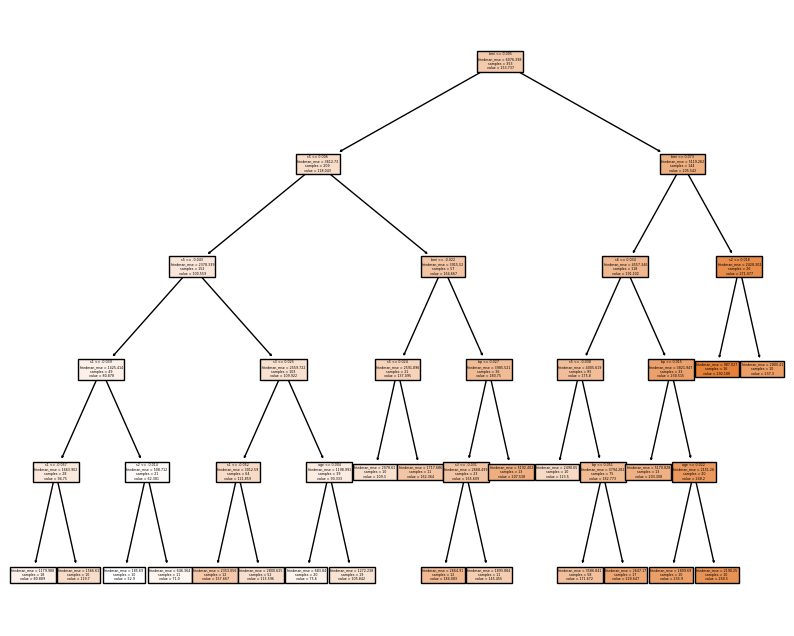

In [53]:
from sklearn import tree
plt.figure(figsize=(10, 8))
plot_tree(dtr_best, feature_names=diabetes.feature_names, filled=True)
plt.show()
